<a href="https://colab.research.google.com/github/LakshminandaKP/machine-learning/blob/main/1st_ML_program.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT**

## **data load**

In [ ]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/refs/heads/master/delaney_solubility_with_descriptors.csv')
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


## data preparation


### separate x and y


In [ ]:
Y=df['logS']
Y


,logS
0,-2.180
1,-2.000
2,-1.740
3,-1.480
4,-3.040
...,...
1139,1.144
1140,-4.925
1141,-3.893
1142,-3.790


In [ ]:
x=df.drop('logS',axis=1)
x

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


### data splitting

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,Y_train,Y_test=train_test_split(x,Y,test_size=0.2,random_state=100)
x_train
Y_train


,logS
107,-4.440
378,-1.250
529,-1.655
546,-1.886
320,-0.740
...,...
802,-2.925
53,-2.680
350,-7.020
79,-4.800


## **model building**

### **linear regression**

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,Y_train)


LinearRegression()

predicting ...


In [ ]:
y_train_pred=lr.predict(x_train)
y_test_pred=lr.predict(x_test)

y_train_pred

array([-2.83668969,  0.84208401, -0.50930302, -0.13058053, -1.6269208 ,
       -2.86103037, -2.32208333, -4.16684323, -5.04235077, -2.29737009,
       -3.15082845, -4.33037208, -1.43700682, -2.59060064, -7.09025955,
       -2.32734557, -4.19073421, -2.63904005, -3.58104074, -3.75929058,
       -2.5501665 , -3.26968347, -2.78911367, -2.69251051, -0.77437547,
       -6.61955792, -2.99084623, -2.36975061, -7.18167736, -1.52816491,
       -4.81736265, -0.86996608, -7.09025955, -1.87404275, -2.58013247,
       -4.80953284, -4.17454084, -1.95444152, -3.50503339, -2.7411418 ,
       -1.87131835, -2.45270806, -3.07252433, -1.48988982, -3.98778754,
       -1.35216679, -0.16932277, -6.05237002, -3.29550658,  0.30513174,
       -3.25501463, -5.31993586, -0.4733928 , -4.79180882, -5.82486323,
       -2.70343539, -3.70838271, -2.4987341 , -2.12301018, -3.11393974,
       -2.79842053, -1.38274662, -4.3267103 , -3.57778946, -3.42356884,
       -9.15826626, -6.52588866, -1.75832085, -4.97842312, -1.59

evaluvating model

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
y_lr_train_mse=mean_squared_error(Y_train,y_train_pred)
y_lr_train_r2=r2_score(Y_train,y_train_pred)

y_lr_test_mse=mean_squared_error(Y_test,y_test_pred)
y_lr_test_r2=r2_score(Y_test,y_test_pred)

In [ ]:
lr_result=pd.DataFrame(["LINEAR REGRESSION",y_lr_train_mse,y_lr_train_r2,y_lr_test_mse,y_lr_test_r2]).transpose()
lr_result.columns=["method","train mse","train r2","test mse","test r2"]
lr_result

,method,train mse,train r2,test mse,test r2
0,LINEAR REGRESSION,1.007536,0.764505,1.020695,0.789162


### Random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(max_depth=2,random_state=100)
rf.fit(x_train,Y_train)


RandomForestRegressor(max_depth=2, random_state=100)

In [ ]:
y_rf_train_pred=rf.predict(x_train)
y_rf_test_pred=rf.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
y_rf_train_mse=mean_squared_error(Y_train,y_rf_train_pred)
y_rf_train_r2=r2_score(Y_train,y_rf_train_pred)

y_rf_test_mse=mean_squared_error(Y_test,y_rf_test_pred)
y_rf_test_r2=r2_score(Y_test,y_rf_test_pred)

In [ ]:
rf_result=pd.DataFrame(["RANDOM FOREST REGRESSOR",y_rf_train_mse,y_rf_train_r2,y_rf_test_mse,y_rf_test_r2]).transpose()
rf_result.columns=["method","train mse","train r2","test mse","test r2"]
rf_result

,method,train mse,train r2,test mse,test r2
0,RANDOM FOREST REGRESSOR,1.028228,0.759669,1.407688,0.709223


In [ ]:
result=pd.concat([lr_result,rf_result],axis=0).reset_index(drop=True)
result

,method,train mse,train r2,test mse,test r2
0,LINEAR REGRESSION,1.007536,0.764505,1.020695,0.789162
1,RANDOM FOREST REGRESSOR,1.028228,0.759669,1.407688,0.709223


## plot

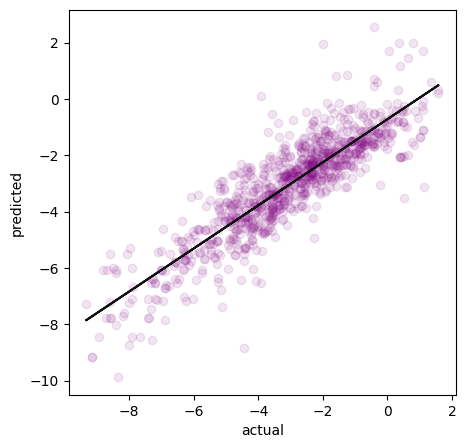

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=[5,5])
plt.scatter(Y_train,y_train_pred,alpha=0.1,c="#800080")

pol=np.polyfit(Y_train,y_train_pred,1)
c=np.poly1d(pol)

plt.plot(Y_train,c(Y_train),c="#111111")
plt.ylabel("predicted")
plt.xlabel("actual")
plt.show()